In [365]:
from google.colab import files
uploaded = files.upload()

Saving blr-traffic-data.csv to blr-traffic-data (1).csv


In [367]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from datetime import timedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [422]:
path = '/content/blr-traffic-data.csv'
df = pd.read_csv(path)

In [423]:
order = (3,1,1)
seasonal_order = (2,1,0,12)

In [424]:
df_excluded = df[['Month','jai1']]
df_excluded = df_excluded[33:107]

In [425]:
df_excluded

,Month,jai1
33,Jan-14,"1,51,966"
34,Feb-14,"1,54,731"
35,Mar-14,"1,49,524"
36,Apr-14,"1,35,376"
37,May-14,"1,41,518"
...,...,...
102,Oct-19,"3,90,731"
103,Nov-19,"3,96,142"
104,Dec-19,"4,28,833"
105,Jan-20,"4,27,578"


In [426]:
df_excluded['Month'] = pd.to_datetime(df_excluded['Month'], format='%b-%y')

In [427]:
df_excluded['jai1'] = df_excluded['jai1'].str.replace(',', '').astype(int)

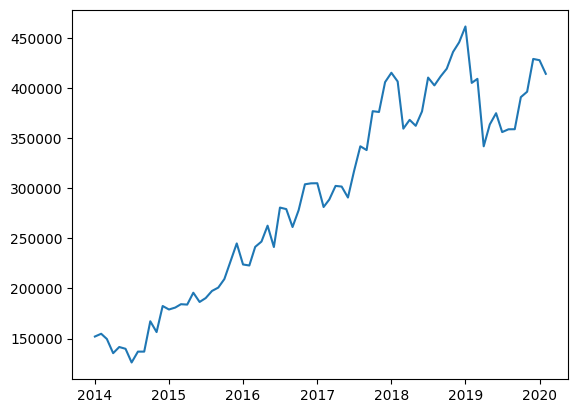

In [428]:
plt.plot(df_excluded['Month'], df_excluded['jai1'])

In [429]:
adf_test = adfuller(df_excluded['jai1'].diff(12).dropna())

print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -1.0682007552233717
p-value: 0.7275850987432035


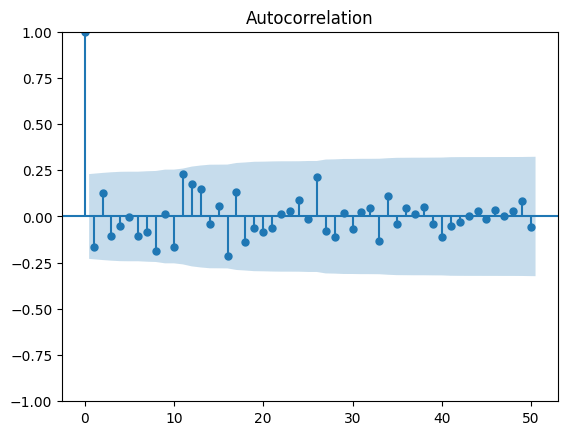

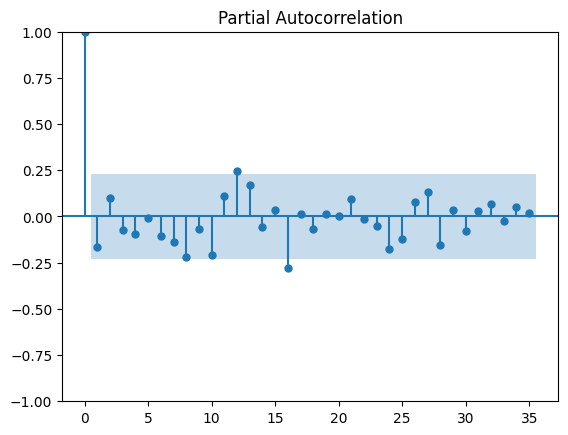

In [430]:
acf_original = plot_acf(df_excluded['jai1'].diff().dropna(), lags=50)

pacf_original = plot_pacf(df_excluded['jai1'].diff().dropna(), lags=35)

In [431]:
test_start = datetime(2019, 8, 1)
df_train = df_excluded[(df_excluded['Month'] < test_start)]

In [432]:
df_test = df_excluded[(df_excluded['Month'] >= test_start)]

In [433]:
testing_range = pd.date_range(start=datetime(2019, 8, 1), end=datetime(2020, 2, 1), freq='MS')

model = SARIMAX(df_train['jai1'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

testing = model_fit.forecast(steps=len(testing_range))

testing_df = pd.DataFrame({'Month': testing_range, 'jai1': testing})

print(testing_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


        Month           jai1
67 2019-08-01  360315.000238
68 2019-09-01  361770.175470
69 2019-10-01  374702.750360
70 2019-11-01  391754.984584
71 2019-12-01  399844.311638
72 2020-01-01  412080.806024
73 2020-02-01  362149.000393


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [434]:
testing_df = testing_df.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [435]:
rmse = np.sqrt(np.mean((df_test['jai1'] - testing_df['jai1']) ** 2))

mae = np.mean(np.abs(df_test['jai1'] - testing_df['jai1']))

rmse, mae

(24069.432949764472, 17346.18895847022)

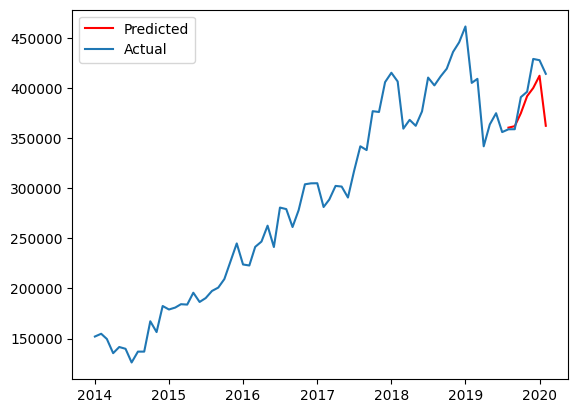

In [436]:
plt.plot(testing_df['Month'], testing_df['jai1'], label='Predicted', color='red')
plt.plot(df_excluded['Month'], df_excluded['jai1'], label='Actual')
plt.legend()

In [437]:
forecast_range = pd.date_range(start=datetime(2020, 3, 1), end=datetime(2049, 12, 31), freq='MS')

model = SARIMAX(df_excluded['jai1'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(forecast_range))

predictions_df = pd.DataFrame({'Month': forecast_range, 'jai1': predictions})

print(predictions_df)

         Month           jai1
107 2020-03-01  405943.719149
108 2020-04-01  362121.049404
109 2020-05-01  374024.559346
110 2020-06-01  383295.122142
111 2020-07-01  374388.928798
..         ...            ...
460 2049-08-01  891760.431011
461 2049-09-01  892452.695092
462 2049-10-01  921544.019348
463 2049-11-01  927844.843000
464 2049-12-01  956347.578543

[358 rows x 2 columns]


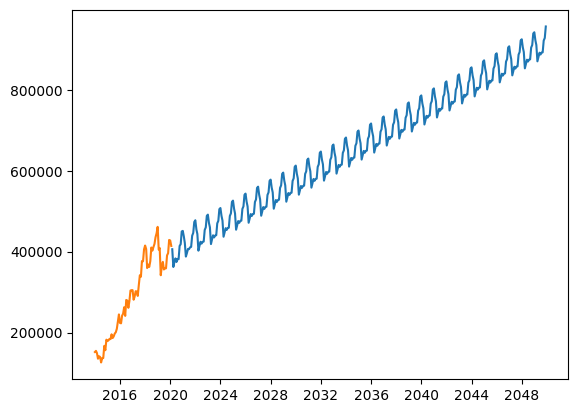

In [438]:
plt.plot(predictions_df['Month'], predictions_df['jai1'], label='Predicted')
plt.plot(df_excluded['Month'], df_excluded['jai1'], label='Predicted')

In [439]:
predictions_df

,Month,jai1
107,2020-03-01,405943.719149
108,2020-04-01,362121.049404
109,2020-05-01,374024.559346
110,2020-06-01,383295.122142
111,2020-07-01,374388.928798
...,...,...
460,2049-08-01,891760.431011
461,2049-09-01,892452.695092
462,2049-10-01,921544.019348
463,2049-11-01,927844.843000
